# Import des packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_column',999)
pd.set_option('display.max_row',999)
np.set_printoptions(threshold=5)
import time,datetime
import random
import re

# Import des données

In [2]:
chemin='chemin du fichier'
food_fact=pd.read_csv(chemin+'en.openfoodfacts.org.products.csv',sep='\t',encoding='utf-8',dtype='category',nrows=100)

In [3]:
food_fact.sample()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
27,0000000001427,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1550231727,2019-02-15T11:55:27Z,1550231732,2019-02-15T11:55:32Z,Pain de maïs bio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
columns_to_load=['product_name','brands','brands_tags','categories','countries','countries_tags','countries_en','categories_tags','categories_en','ingredients_text',
'traces','traces_tags','no_nutriments','main_category','main_category_en','nutriscore_score','nutriscore_grade'] #'nutrition_grade_fr','main_category_fr'
cols_100g=food_fact.columns[food_fact.columns.str.contains('100g')].to_list()
columns_to_load=columns_to_load+cols_100g
food_fact=pd.read_csv(chemin + 'en.openfoodfacts.org.products.csv',sep='\t',encoding='utf-8',dtype='object',usecols=columns_to_load)

In [5]:
nb_row=food_fact.shape[0]
percentage_na_col=food_fact.apply(lambda x:(x.notna().sum()/nb_row)*100,axis=0)

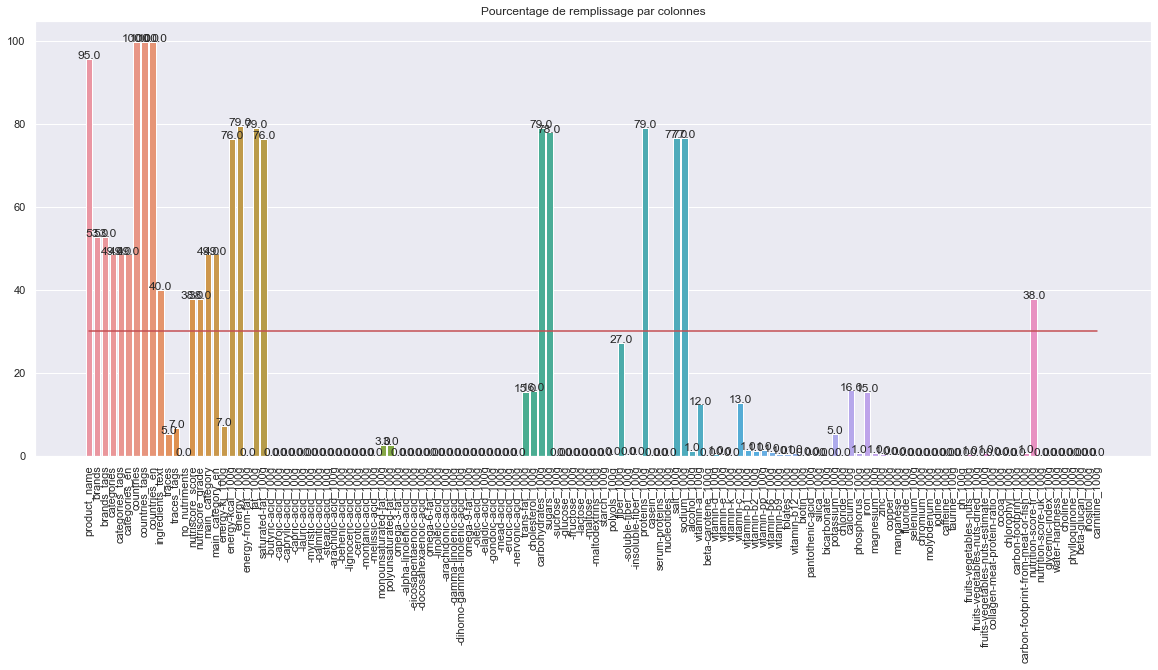

In [6]:
sns.set(font_scale=1)
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
nb_col=food_fact.shape[1]
ax=sns.barplot(x=percentage_na_col.index,y=percentage_na_col.values)
plt.plot(percentage_na_col.index,[30]*nb_col, 'r')
i=0
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+0.4,height,round(percentage_na_col.values[i],0),ha='center')
    i+=1

plt.title('Pourcentage de remplissage par colonnes')
plt.show()

In [7]:
columns=percentage_na_col[percentage_na_col.values>30].index.to_list()

food=food_fact[columns]
print(len(food.columns))
food.sample()

24


,product_name,brands,brands_tags,categories,categories_tags,categories_en,countries,countries_tags,countries_en,ingredients_text,nutriscore_score,nutriscore_grade,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1468841,clasicas tila,NaN,NaN,NaN,NaN,NaN,en:fr,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
food=food.drop(columns=['categories','ingredients_text','categories_tags','brands','countries','countries_tags','main_category','main_category_en'])

In [9]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707250 entries, 0 to 1707249
Data columns (total 16 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   product_name             object
 1   brands_tags              object
 2   categories_en            object
 3   countries_en             object
 4   nutriscore_score         object
 5   nutriscore_grade         object
 6   energy-kcal_100g         object
 7   energy_100g              object
 8   fat_100g                 object
 9   saturated-fat_100g       object
 10  carbohydrates_100g       object
 11  sugars_100g              object
 12  proteins_100g            object
 13  salt_100g                object
 14  sodium_100g              object
 15  nutrition-score-fr_100g  object
dtypes: object(16)
memory usage: 208.4+ MB


In [10]:
# '1.2'.isdigit() #False
nb_row=food.shape[0]
cols = list(food.select_dtypes(include=['object']).columns)
numcols=[]
for col in cols:
    rnd = random.randint(0, nb_row)
    item=food.loc[rnd,col]
    while pd.isna(item):
        rnd = random.randint(0, nb_row)
        item=food.loc[rnd,col]
    if item.replace('.','',1).isdigit():
        numcols.append(col)

food[numcols]=food[numcols].apply(lambda x: pd.to_numeric(x))

In [11]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707250 entries, 0 to 1707249
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   product_name             object 
 1   brands_tags              object 
 2   categories_en            object 
 3   countries_en             object 
 4   nutriscore_score         float64
 5   nutriscore_grade         object 
 6   energy-kcal_100g         float64
 7   energy_100g              float64
 8   fat_100g                 float64
 9   saturated-fat_100g       float64
 10  carbohydrates_100g       float64
 11  sugars_100g              float64
 12  proteins_100g            float64
 13  salt_100g                float64
 14  sodium_100g              float64
 15  nutrition-score-fr_100g  float64
dtypes: float64(11), object(5)
memory usage: 208.4+ MB


In [12]:
food=food.drop_duplicates(['product_name','brands_tags'])
idx=food.categories_en.str.contains(':')
food=food.iloc[idx.values==False]

In [13]:
cols = list(food.select_dtypes(include=['object']).columns)
nb_row=food.shape[0]
for col in cols:
    nb_cat=len(food[col].unique())
    if 0.60*nb_row>nb_cat:
        food[col]=food[col].astype('category')

In [14]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610570 entries, 3 to 1707249
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   product_name             608163 non-null  object  
 1   brands_tags              477845 non-null  category
 2   categories_en            610570 non-null  category
 3   countries_en             609459 non-null  category
 4   nutriscore_score         480506 non-null  float64 
 5   nutriscore_grade         480506 non-null  category
 6   energy-kcal_100g         512466 non-null  float64 
 7   energy_100g              546993 non-null  float64 
 8   fat_100g                 545789 non-null  float64 
 9   saturated-fat_100g       514886 non-null  float64 
 10  carbohydrates_100g       545472 non-null  float64 
 11  sugars_100g              531998 non-null  float64 
 12  proteins_100g            545645 non-null  float64 
 13  salt_100g                539861 non-null  f

In [15]:
food.reset_index(drop=True,inplace=True)

In [16]:
food

,product_name,brands_tags,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,moutarde au moût de raisin,courte-paille,"Groceries,Condiments,Sauces,Mustards",France,18.0,d,NaN,936.0,8.2,2.2,29.0,22.0,5.1,4.60,1.840,18.0
1,Salade de carottes râpées,NaN,"Meals,Prepared vegetables,Grated carrots,Seaso...",France,1.0,b,32.0,134.0,0.3,0.1,5.3,3.9,0.9,0.42,0.168,1.0
2,Tarte noix de coco,"crous-resto,crous","Pies,Sweet pies,Coconut pies",France,14.0,d,381.0,1594.0,22.0,15.5,27.3,21.9,4.6,0.10,0.040,14.0
3,Compote de poire,crous,"Plant-based foods and beverages,Plant-based fo...",France,-2.0,a,157.0,657.0,0.0,0.0,36.0,27.0,0.6,0.00,0.000,-2.0
4,Salade de macedoine de légumes,NaN,"Meals,Prepared vegetables,Starters,Cold starte...",France,1.0,b,143.0,598.0,12.7,1.0,3.9,1.0,1.9,0.27,0.108,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610565,Chocolat de Couverture Noir,barry,"Snacks,Sweet snacks,Chocolates,Dark chocolates",France,22.0,e,584.0,2443.0,46.9,28.2,30.7,26.9,7.6,0.03,0.012,22.0
610566,Miel d'acacia ruchers de badon,NaN,"Spreads,Breakfasts,Bee products,Farming produc...",France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610567,Riz parfumé,king-elephant,"Plant-based foods and beverages,Plant-based fo...",France,0.0,b,351.0,1469.0,0.5,0.0,80.0,0.0,7.0,0.00,0.000,0.0
610568,Minis beignets,NaN,"Snacks,Sweet snacks,Sweet Fritters",France,15.0,d,333.0,1393.0,20.2,6.0,30.9,10.4,7.4,1.10,0.440,15.0


In [17]:
cols = list(food.select_dtypes(include=['category']).columns)
for col in cols[0:3]:
    food=food.drop(food[food[col].isnull()].index)
food.reset_index(drop=True,inplace=True)

In [18]:
food

,product_name,brands_tags,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,moutarde au moût de raisin,courte-paille,"Groceries,Condiments,Sauces,Mustards",France,18.0,d,NaN,936.0,8.2,2.2,29.0,22.0,5.1,4.600,1.8400,18.0
1,Tarte noix de coco,"crous-resto,crous","Pies,Sweet pies,Coconut pies",France,14.0,d,381.0,1594.0,22.0,15.5,27.3,21.9,4.6,0.100,0.0400,14.0
2,Compote de poire,crous,"Plant-based foods and beverages,Plant-based fo...",France,-2.0,a,157.0,657.0,0.0,0.0,36.0,27.0,0.6,0.000,0.0000,-2.0
3,Nectar d'abricot,ferme-de-l-aiguemarse,"Plant-based foods and beverages,Beverages,Plan...",France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAguette bressan,crousresto,"Plant-based foods and beverages,Plant-based fo...",France,-4.0,a,160.0,669.0,2.2,0.5,25.2,0.6,9.5,0.358,0.1432,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476784,cup noodles,nissin,"Plant-based foods and beverages,Plant-based fo...",France,NaN,NaN,84.0,351.0,3.8,2.0,10.2,0.5,1.8,1.000,0.4000,NaN
476785,Veganes Mühlenhack,rugenwalder-muhle,"Plant-based foods and beverages,Plant-based fo...",Germany,-3.0,a,120.0,502.0,3.2,0.3,2.1,0.5,18.0,1.500,0.6000,-3.0
476786,Comte vieux,biocoop,"Dairies,Fermented foods,Fermented milk product...",France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476787,Chocolat de Couverture Noir,barry,"Snacks,Sweet snacks,Chocolates,Dark chocolates",France,22.0,e,584.0,2443.0,46.9,28.2,30.7,26.9,7.6,0.030,0.0120,22.0


In [19]:
cols = list(food.select_dtypes(include=['category']).columns)
for col in cols:
    print(col)
    print(len(food[col].unique().to_list()))


brands_tags
86766
categories_en
31939
countries_en
3032
nutriscore_grade
6


In [46]:
food[cols].apply(lambda x: len(x.unique()))

brands_tags      1199
categories_en      53
countries_en       74
dtype: int64

In [20]:
food.categories_en=list(map(lambda x: x.split(',')[0],food.categories_en.to_list()))
food.categories_en=food.categories_en.astype('category')
food.countries_en=list(map(lambda x: x.split(',')[0],food.countries_en.to_list()))
food.countries_en=food.countries_en.astype('category')

In [21]:
foodbk=food.copy()

In [22]:
food=foodbk.copy()

In [23]:
catcols = list(food.select_dtypes(include=['category']).columns)
food[catcols]=food[catcols].astype('object')

cate=[]
for col in catcols:
    cat=food[col].unique()
    if len(food[col].unique())>100:
        cat_dist=food.groupby([col]).count()
        cat_dist=cat_dist[cat_dist.product_name>50]
        cat=cat_dist.index.to_list()
    cate.append(cat)
i=0    
for col in catcols:
    print(col)
    print(len(cate[i]))
#     print(cate[i])
    food=food[food[col].isin(cate[i])]
    i=i+1
    food.reset_index(drop=True,inplace=True)
#     print(len(food[col].unique()))
#     print(food.groupby([col]).count())
food[catcols]=food[catcols].astype('category')

brands_tags
1199
categories_en
53
countries_en
74
nutriscore_grade
6


In [24]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208258 entries, 0 to 208257
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   product_name             208131 non-null  object  
 1   brands_tags              208258 non-null  category
 2   categories_en            208258 non-null  category
 3   countries_en             208258 non-null  category
 4   nutriscore_score         173343 non-null  float64 
 5   nutriscore_grade         173343 non-null  category
 6   energy-kcal_100g         176157 non-null  float64 
 7   energy_100g              192838 non-null  float64 
 8   fat_100g                 192099 non-null  float64 
 9   saturated-fat_100g       184541 non-null  float64 
 10  carbohydrates_100g       192181 non-null  float64 
 11  sugars_100g              189235 non-null  float64 
 12  proteins_100g            192368 non-null  float64 
 13  salt_100g                190572 non-null  fl

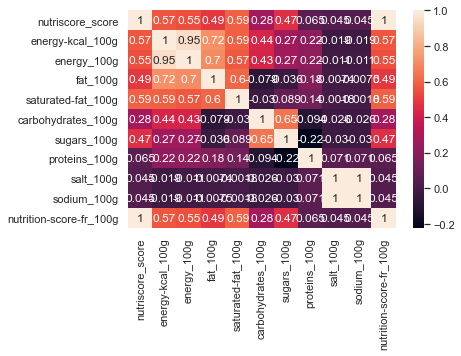

In [25]:
cor=food.corr()
sns.set(font_scale=1)
sns.heatmap(cor, annot=True)
plt.show()

In [26]:
df=cor>0.99
fortcorr=[]
for i in df.index:
    for j in df.columns:
        if i!=j:
            if df.loc[i,j]==True:
                fortcorr.append((i,j))

In [27]:
fortcorr

[('nutriscore_score', 'nutrition-score-fr_100g'),
 ('salt_100g', 'sodium_100g'),
 ('sodium_100g', 'salt_100g'),
 ('nutrition-score-fr_100g', 'nutriscore_score')]

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
for i in range(int(len(fortcorr)/2)):
    idx=(list(fortcorr[i]))
    to_impute=food[idx]
    imputer.fit(to_impute)
    imputed = imputer.transform(to_impute)
    food[idx]=imputed


In [29]:
# Les résultats du calcul donnent une valeur comprise entre –15 et +40. 
# La couleur verte correspondant à une valeur comprise entre –15 et –2, 
# le vert clair de –1 à +3,
# le jaune de +4 à +11, 
# l'orange de +12 à +16 et 
# le rouge de +17 à +40.
def nutrigrade(score):
    if score<-15:
        grade ='NaN'
    elif score <= -2:
         grade ='a'
    elif score <=3:
         grade ='b'
    elif score<=11:
         grade ='c'
    elif score<=16:
         grade ='d'
    elif score<=40:
         grade ='e'
    else :
        grade='NaN'
    return grade
        
# nutrigrade(24)
food['nutriscore_grade']=food['nutriscore_score'].apply(nutrigrade)


In [30]:
food

,product_name,brands_tags,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Pur jus de pomme,les-jardins-de-gaia,Plant-based foods and beverages,France,0.000000,b,221.0,925.0,0.5,0.1,0.01,0.01,0.50,0.010000,0.004000,0.000000
1,Blanquette de Volaille et son Riz,comme-j-aime,Meals,France,0.000000,b,NaN,450.0,2.2,0.9,15.30,0.50,6.80,0.700000,0.280000,0.000000
2,Raviolini au Fromage de chèvre et Pesto,comme-j-aime,Meals,France,2.000000,b,NaN,455.0,4.2,2.1,12.50,1.40,4.40,0.600000,0.240000,2.000000
3,Salade Cesar,kirkland-signature,Plant-based foods and beverages,Canada,6.000000,c,290.0,1210.0,12.0,7.0,23.00,0.00,22.00,2.160000,0.864000,6.000000
4,Danoises à la cannelle roulées,kirkland-signature,Snacks,Canada,8.233755,c,363.0,1520.0,14.4,NaN,54.10,28.10,4.79,0.922000,0.369000,8.233755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208253,Nectar de mangue,gilbert,Plant-based foods and beverages,France,17.000000,e,51.0,213.0,0.5,0.0,12.10,12.10,0.50,0.030000,0.012000,17.000000
208254,Melange fruits noix et baies,marks-spencer,Plant-based foods and beverages,France,16.000000,d,419.0,1753.0,19.3,2.8,49.50,44.40,6.10,0.030000,0.012000,16.000000
208255,Jus multifruits,pressade,Plant-based foods and beverages,France,11.000000,c,42.0,176.0,0.0,0.0,10.00,10.00,0.50,0.000000,0.000000,11.000000
208256,cup noodles,nissin,Plant-based foods and beverages,France,8.233755,c,84.0,351.0,3.8,2.0,10.20,0.50,1.80,1.000000,0.400000,8.233755


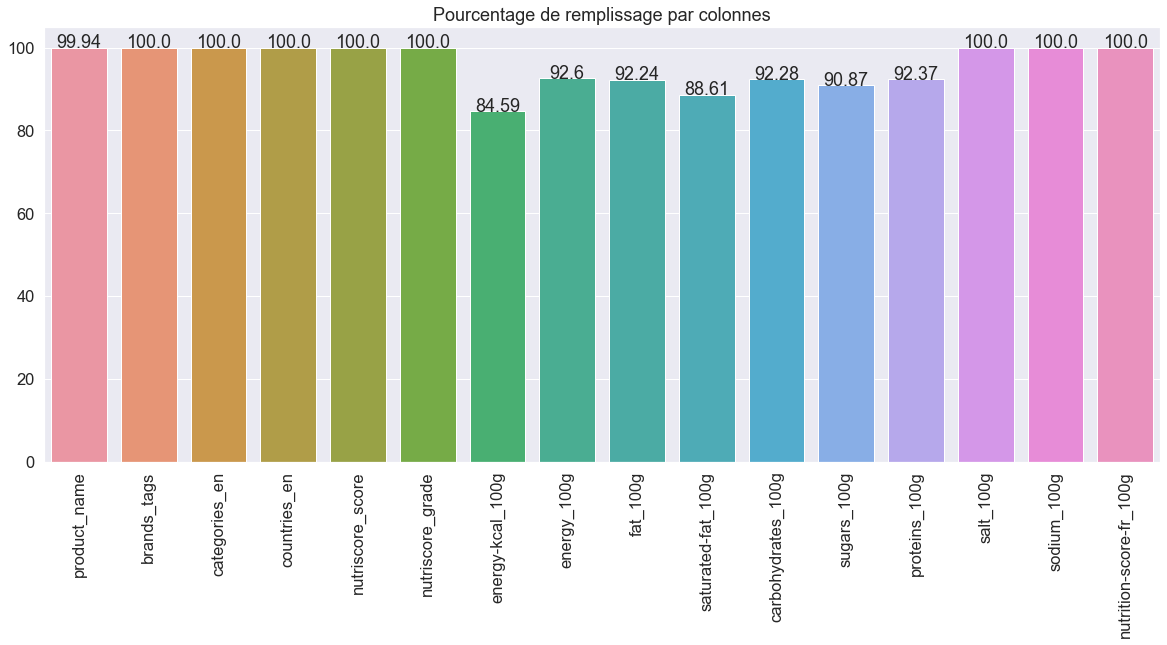

In [31]:
nb_row=food.shape[0]
percentage_na_col=food.apply(lambda x:(x.notna().sum()/nb_row)*100,axis=0)

sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax=sns.barplot(x=percentage_na_col.index,y=percentage_na_col.values)
i=0
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+0.4,height,round(percentage_na_col.values[i],2),ha='center')
    i+=1
plt.title('Pourcentage de remplissage par colonnes')
plt.show()

In [32]:
cols = list(food.select_dtypes(include=['category']).columns)
dummy=[]
for col in cols:
    print(col)
    print(len(food[col].unique().to_list()))
    if len(food[col].unique().to_list())<100:
        dummy.append(col)
dummy

brands_tags
1199
categories_en
53
countries_en
74


['categories_en', 'countries_en']

In [33]:
fooddummies=pd.get_dummies(food,columns=dummy)
numcol = list(fooddummies.select_dtypes(include=['uint8','float']).columns)
numcol

['nutriscore_score',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g',
 'categories_en_Aliments-d-origine-vegetale',
 'categories_en_Baby foods',
 'categories_en_Baking-decorations',
 'categories_en_Bee products',
 'categories_en_Beverages',
 'categories_en_Biscuits and cakes',
 'categories_en_Breaded products',
 'categories_en_Breakfasts',
 'categories_en_Canned foods',
 'categories_en_Chips and fries',
 'categories_en_Christmas foods and drinks',
 'categories_en_Cocoa and chocolate powders',
 'categories_en_Cooking helpers',
 'categories_en_Crêpes and galettes',
 'categories_en_Dairies',
 'categories_en_Desserts',
 'categories_en_Dietary supplements',
 'categories_en_Dried products',
 'categories_en_Easter food',
 'categories_en_Farming products',
 'categories_en_Fats',
 'categories_en_Fish and meat and eggs',
 'categories_en_Fish eggs',
 'categori

In [40]:
from sklearn.impute import KNNImputer
i0=0
while i0<food.shape[0]:
    print('**')
    i1=i0+round(food.shape[0]/10)   
    if i1>food.shape[0]:
        i1=food.shape[0]
    print(i0)
    print(i1)
    imputer = KNNImputer(n_neighbors=3)
    imputed = imputer.fit_transform(fooddummies.loc[i0:i1,numcol])
    fooddummies.loc[i0:i1,numcol]=imputed
    i0=i1 

**
0
20826
**
20826
41652
**
41652
62478
**
62478
83304
**
83304
104130
**
104130
124956
**
124956
145782
**
145782
166608
**
166608
187434
**
187434
208258


In [41]:
tonumeric_cols= list(food.select_dtypes(include=['float']).columns)
tonumeric_cols

['nutriscore_score',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [42]:
food[tonumeric_cols]=fooddummies[tonumeric_cols]

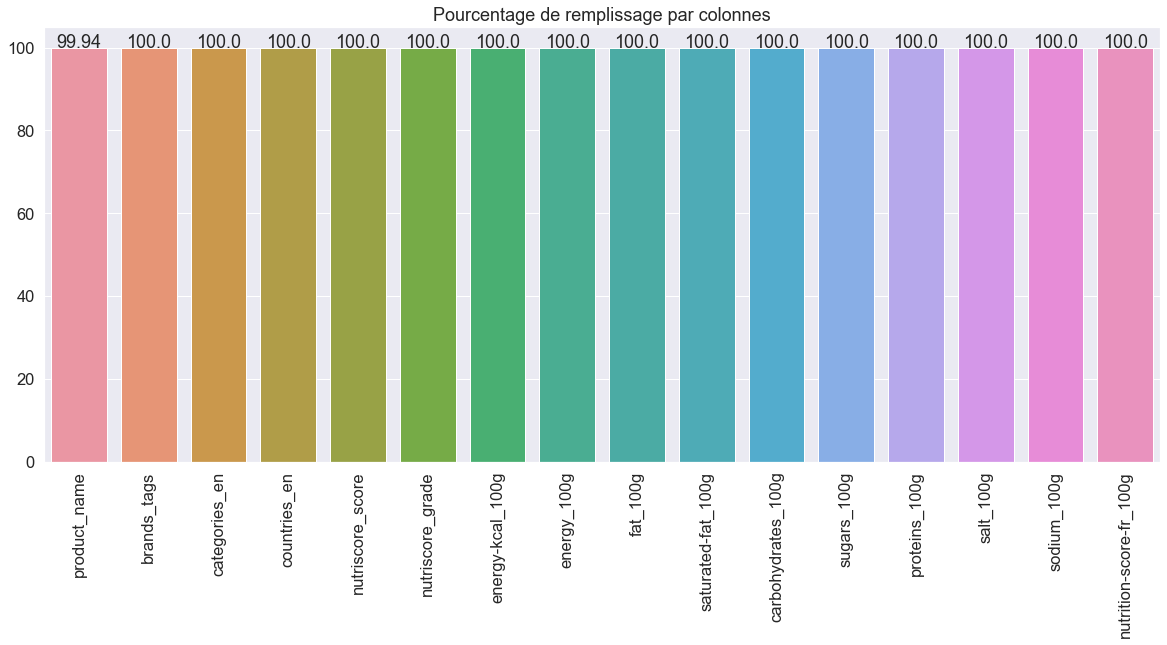

In [43]:
nb_row=food.shape[0]
percentage_na_col=food.apply(lambda x:(x.notna().sum()/nb_row)*100,axis=0)

sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax=sns.barplot(x=percentage_na_col.index,y=percentage_na_col.values)
i=0
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+0.4,height,round(percentage_na_col.values[i],2),ha='center')
    i+=1
plt.title('Pourcentage de remplissage par colonnes')
plt.show()

In [44]:
food

,product_name,brands_tags,categories_en,countries_en,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Pur jus de pomme,les-jardins-de-gaia,Plant-based foods and beverages,France,0.000000,b,221.0,925.0,0.5,0.10,0.01,0.01,0.50,0.010000,0.004000,0.000000
1,Blanquette de Volaille et son Riz,comme-j-aime,Meals,France,0.000000,b,108.0,450.0,2.2,0.90,15.30,0.50,6.80,0.700000,0.280000,0.000000
2,Raviolini au Fromage de chèvre et Pesto,comme-j-aime,Meals,France,2.000000,b,109.0,455.0,4.2,2.10,12.50,1.40,4.40,0.600000,0.240000,2.000000
3,Salade Cesar,kirkland-signature,Plant-based foods and beverages,Canada,6.000000,c,290.0,1210.0,12.0,7.00,23.00,0.00,22.00,2.160000,0.864000,6.000000
4,Danoises à la cannelle roulées,kirkland-signature,Snacks,Canada,8.233755,c,363.0,1520.0,14.4,2.44,54.10,28.10,4.79,0.922000,0.369000,8.233755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208253,Nectar de mangue,gilbert,Plant-based foods and beverages,France,17.000000,e,51.0,213.0,0.5,0.00,12.10,12.10,0.50,0.030000,0.012000,17.000000
208254,Melange fruits noix et baies,marks-spencer,Plant-based foods and beverages,France,16.000000,d,419.0,1753.0,19.3,2.80,49.50,44.40,6.10,0.030000,0.012000,16.000000
208255,Jus multifruits,pressade,Plant-based foods and beverages,France,11.000000,c,42.0,176.0,0.0,0.00,10.00,10.00,0.50,0.000000,0.000000,11.000000
208256,cup noodles,nissin,Plant-based foods and beverages,France,8.233755,c,84.0,351.0,3.8,2.00,10.20,0.50,1.80,1.000000,0.400000,8.233755


In [ ]:
# food.to_csv('cleaned_data.csv',sep=';',index=False) 